# 웹 크롤링

In [96]:
from IPython.display import Image

## 1. HTML 셀렉터

![selector](http://ssossotable.com/sample_src/selector.PNG)

### 1. tag
- HTML 태그
- h1, img, input, div...

### 2. id
- 유일성이 있는 셀렉터
- ***중복되어서는 안 됨***
- samsaek, dodo, moo...

### 3. class
- 다양한 객체가 공통된 클래스를 가질 수 있다
- ***중복 가능***
- cat, samsaek-family...

# 2. Selenium을 이용한 웹 크롤링 

### 2.1 셀레니움 설치

- 크롬용 웹드라이버 설치(다른 브라우저도 가능)

https://chromedriver.chromium.org/downloads

### 2.2 필요 모듈 설치
- bs4, selenium, webdriver_manager.chrome 설치

In [94]:
# 크롤링 관련 모듈
from bs4 import BeautifulSoup 
from selenium import webdriver
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

import time

In [27]:
driver=None

In [92]:
# 드라이버 세팅 함수
def set_chrome_driver():
    global driver
    if driver is None:
        chrome_options = webdriver.ChromeOptions()
        return webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
    else:
        return driver

In [93]:
# 드라이버 리셋 함수
def reset_driver():
    global driver
    driver.quit()
    if driver is None:
        pass
    else:
        driver = None

### 2.3 셀레니움을 이용한 웹페이지 접속

In [63]:
# 드라이버 세팅
driver=set_chrome_driver()

In [64]:
URL="http://ssossotable.com/sample.html"
# 타겟 페이지 접속
driver.get(URL)
time.sleep(2)

### 2.3.1 태그로 찾기

In [74]:
# img tag들을 찾음
e=driver.find_elements(By.TAG_NAME,'img')

In [75]:
# 첫 번째 img태그의 src를 가져옴
e0_src=e[0].get_dom_attribute('src')

In [76]:
# 이미지 메타데이터
e0_src

'http://ssossotable.com/sample_src/samsaek.jpeg'

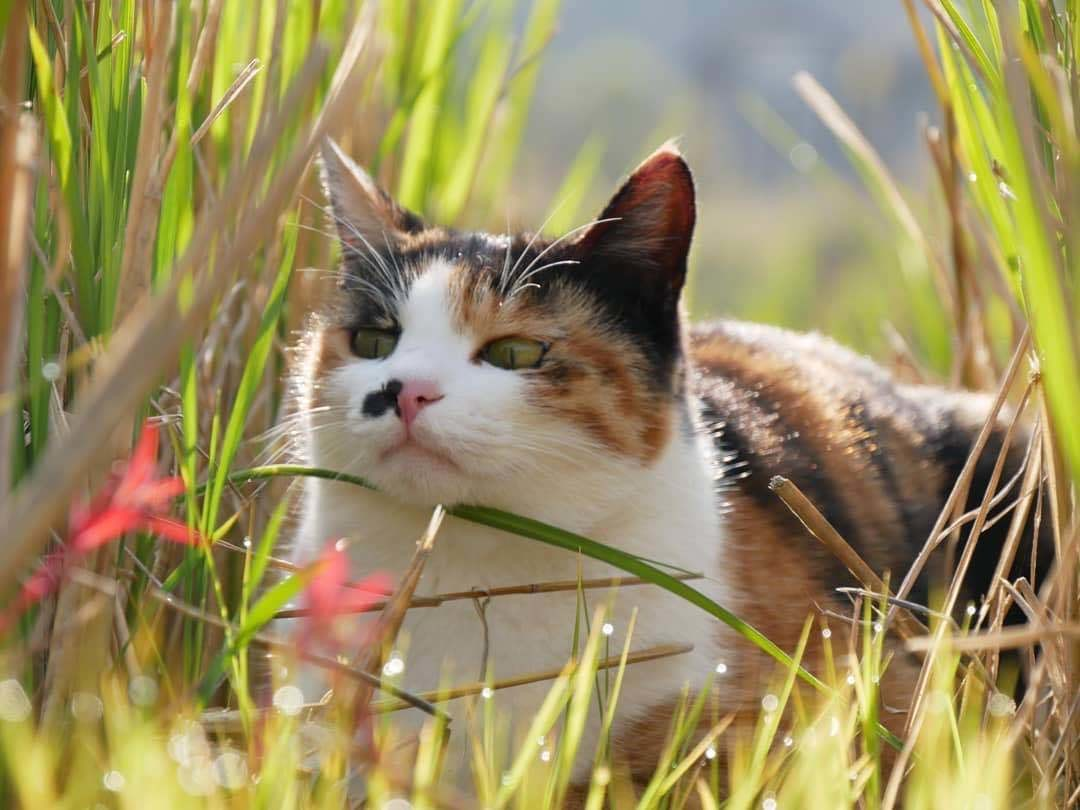

In [78]:
Image(e0_src)

### 2.3.2 클래스로 찾기

In [71]:
# samsaek-family 클래스들을 찾음
e=driver.find_elements(By.CLASS_NAME,'samsaek-family')

In [80]:
e1_src=e[1].get_dom_attribute('src')

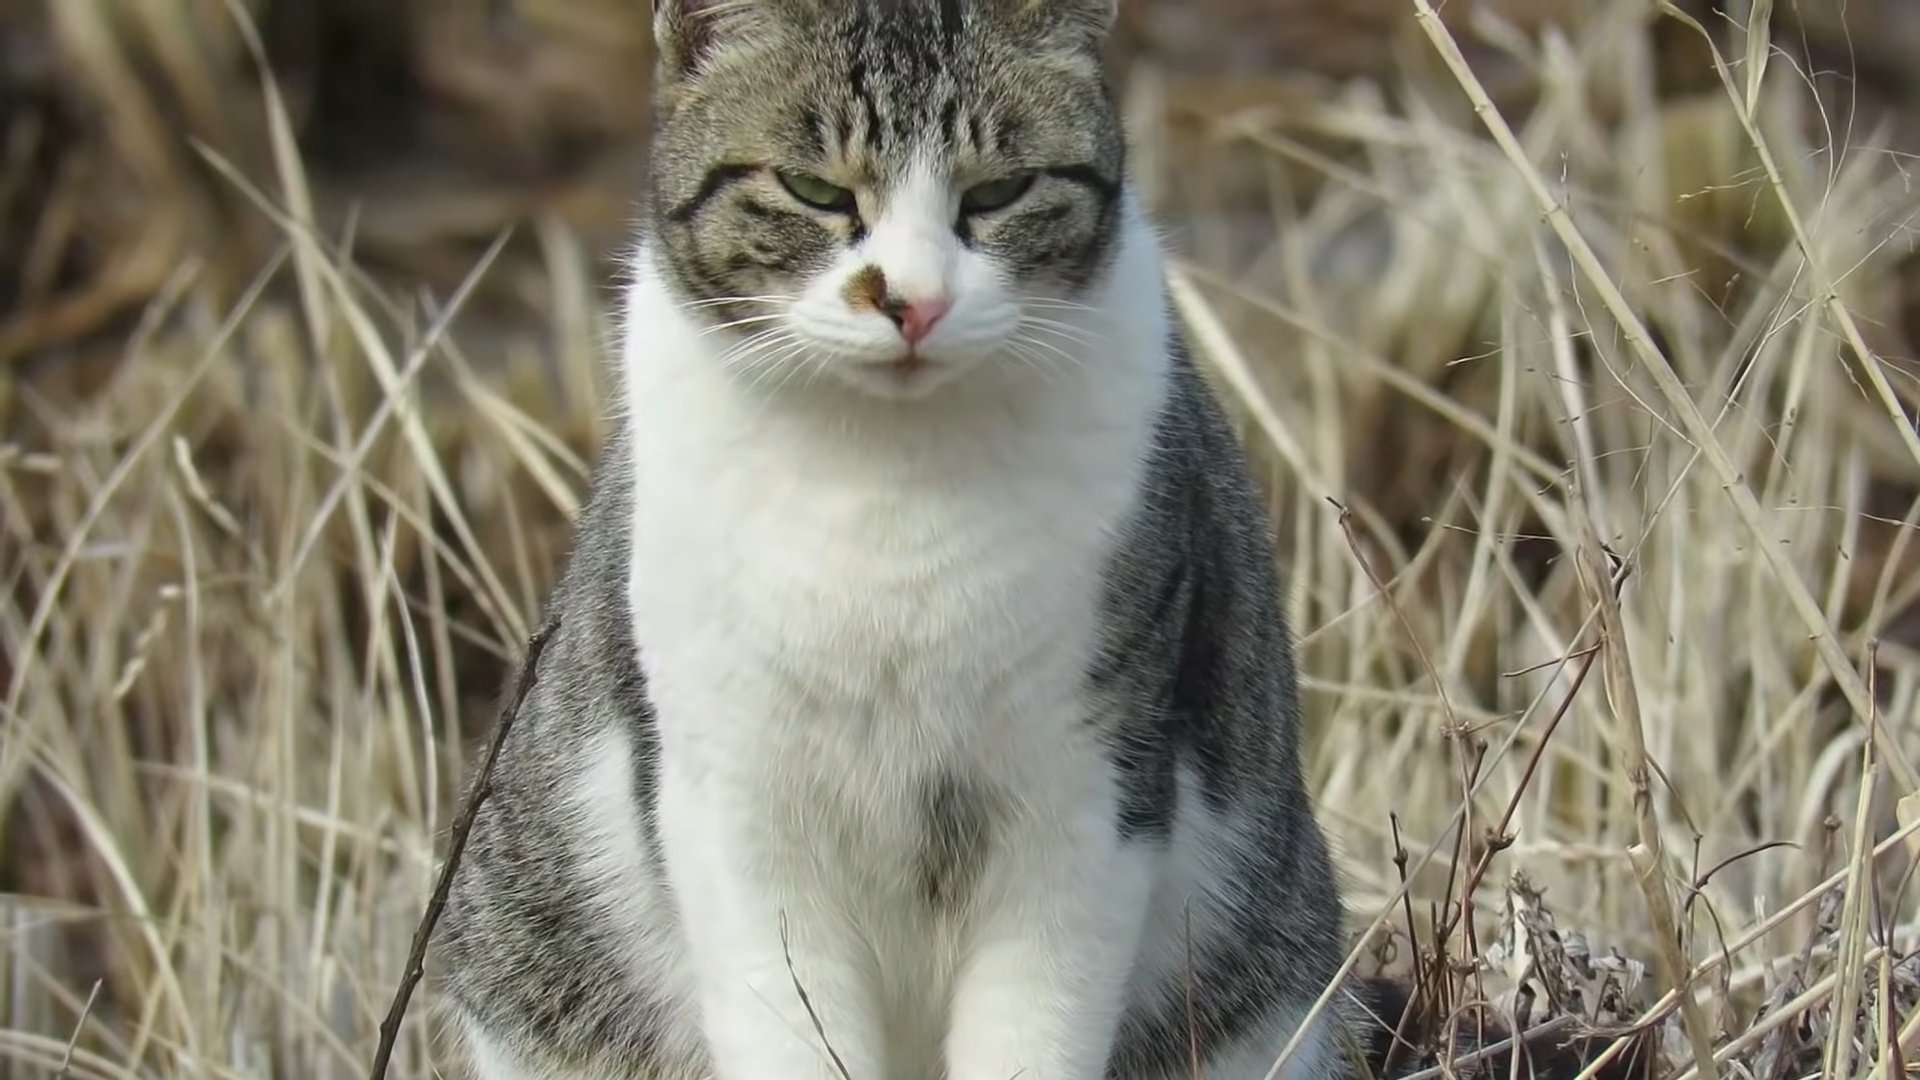

In [81]:
Image(e1_src)

### 2.3.3 id로 찾기

In [88]:
# dodo id를 찾음
e=driver.find_element(By.ID,'moo')

In [89]:
e_src=e.get_dom_attribute('src')

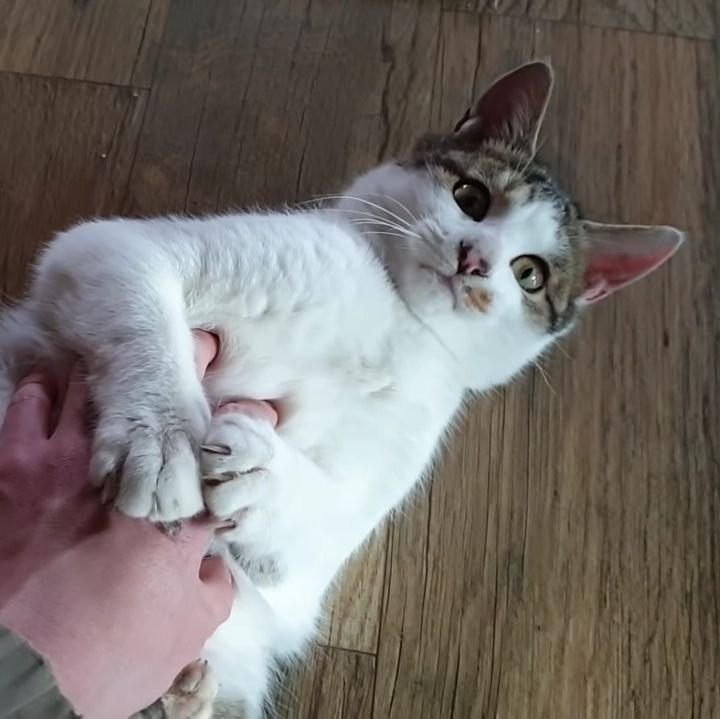

In [90]:
Image(e_src)

In [91]:
reset_driver()

# TODO

1. 하나의 웹 페이지를 선택하세요
2. 해당 웹 페이지에서 음식 이름을 검색하여 나오는 이미지들을 크롤링하세요
    - pymysql을 통한 DB연동
    - food 테이블에서 음식 이름 가져오기
    - 음식 이름을 통한 검색
    - 음식 사진 메타데이터 획득
    - 해당 음식 사진 메타데이터를 DB에 update
3. 해당 과정을 DB의 모든 음식 데이터에 대해 반복하세요